In [1]:
from dtcs.spec.xps import XPSSpeciesManager
from dtcs.spec.crn.bulk import CRNSpec, Rxn, RevRxn, Conc, ConcEq, ConcDiffEq, Schedule

# The Species Manager lets us define species by specifying a name, as well as the sort of 'signature' of the species we're defining 
# (in this case, orbital information and binding energies)
sm = XPSSpeciesManager()
h2o_g = sm.make_species('H2O_g', 535.0, color='gray', latex='H_2O_g')
o2_g = sm.make_species('O2_g', 535.0, color='gray', latex='O_{2g}')
h2o = sm.make_species('H2O', 532.2, color='blue', latex='H_2O^*')
oh = sm.make_species('OH', 0, color='red', latex='OH^*') #530.9
o = sm.make_species('O', 0, color='aqua', latex='O^*') #530.0
oh_h2o = sm.make_species('OH-H2O_{hb}', 0, color='black', latex='OH\!-\!H_2O^*') #531.6
o_h2o = sm.make_species('O-H2O_{hb}', 0, color='black', latex='O\!-\!H_2O^*') #531.6
h2o_multi = sm.make_species('multiH2O', 533.2, color='magenta', latex='H_2O_{multi}^*')

# We need to combine the OH in OH and OH-H2O, combine O in O and O-H2O, combine H2O_O and H2O_OH to form H2O_hb
oh_combined = sm.make_species('OH_combined', 530.9, color='red', latex='OH combined^*')
o_combined = sm.make_species('O_combined', 530.0, color='aqua', latex='O combined^*')
h2o_hbond_combined = sm.make_species('H2O_{hb}_combined', 531.6, color='black', latex='H_2O_{hb} combined^*')

In [2]:
crn = CRNSpec(
    Rxn(o + h2o_g, o_h2o, k=3.915042),                  # H2O on O* Adsorption with HB (1)
    Rxn(oh + h2o_g, oh_h2o, k=1.664002),                # H2O on OH* Adsorption with HB (2)
    Rxn(o_h2o, oh + oh, k=6.220646),     # O-H2O react to form 2 OHs (3)
    Rxn(oh + oh, o_h2o, k=0.160755),
    Rxn(oh_h2o, h2o + oh, k=0.299507),                  # OH-H2O Diffusion (4)
    Rxn(o_h2o, h2o + o, k=0.167130),                    # O-H2O Diffusion (5)
    Rxn(h2o, h2o_g, k=0.794455),                        # H2O Desorption, (6)
    Rxn(h2o_g, h2o, k=0.629363),                        # H2O Adsorption, (7)
    Rxn(oh_h2o, oh + h2o_g, k=0.300480),                # H2O on OH* Desorption with HB (8)
    Rxn(o_h2o, o + h2o_g, k=0.127713),                  # H2O on O* Desorption with HB (9)
    Rxn(oh_h2o + h2o_g, h2o_multi, k=1.267427),         # H2O on OH-H2O* Adsorption (10)
    Rxn(h2o_multi, oh_h2o + h2o_g, k=0.394500),         # H2O on OH-H2O* Desorption (11)
    
                                                                 
    ConcEq(oh_combined,oh + oh_h2o),                         
    ConcEq(o_combined,o + o_h2o),
    ConcEq(h2o_hbond_combined,o_h2o + oh_h2o),
    
    Conc(h2o_g, 1),                                     
    Conc(o, 0.25),
    sm,
    time=20,
)

cts = crn.simulate()

In [3]:
xps = cts.xps_with(species=[h2o, oh_combined, o_combined, h2o_hbond_combined, h2o_multi])

<Axes: title={'center': 'time=20.0'}>

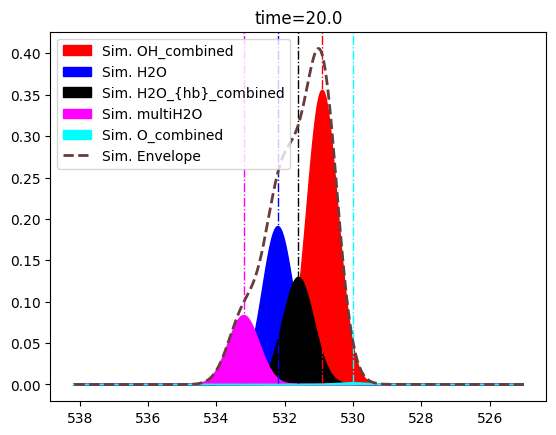

In [4]:
xps.plot()

In [5]:
xps

In [6]:
xps.df['simulated']['envelope']

eV
525.000    3.614191e-30
525.001    3.704361e-30
525.002    3.796762e-30
525.003    3.891449e-30
525.004    3.988477e-30
               ...     
538.196    1.604045e-28
538.197    1.565023e-28
538.198    1.526943e-28
538.199    1.489782e-28
538.200    1.453518e-28
Name: envelope, Length: 13201, dtype: float64

In [7]:
type(xps.df['simulated']['envelope'])

pandas.core.series.Series

In [8]:
X = xps.df['simulated'].index.to_list()

In [9]:
Y = xps.df['simulated']['envelope'].to_list()

In [10]:
spectra_data = {
        "location": X,
        "intensity": Y,
    }

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
def plot_single_spectra(spectra_data):
    wavenumbers = spectra_data["location"]
    transmittance = spectra_data["intensity"]
    sns.set_theme(style="whitegrid")
    sns.set_context("talk")
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=wavenumbers, y=transmittance, linewidth=2.5)
    plt.gca().invert_xaxis()
    plt.xlabel("Wavenumber (cm$^{-1}$)", fontsize=14)
    plt.ylabel("Transmittance (%)", fontsize=14)
    plt.title(
        "Spectra Plot: Transmittance vs Wavenumber", fontsize=16, fontweight="bold"
    )
    plt.grid(True, which="both", axis="both", linestyle="--", linewidth=0.7)
    plt.tight_layout()

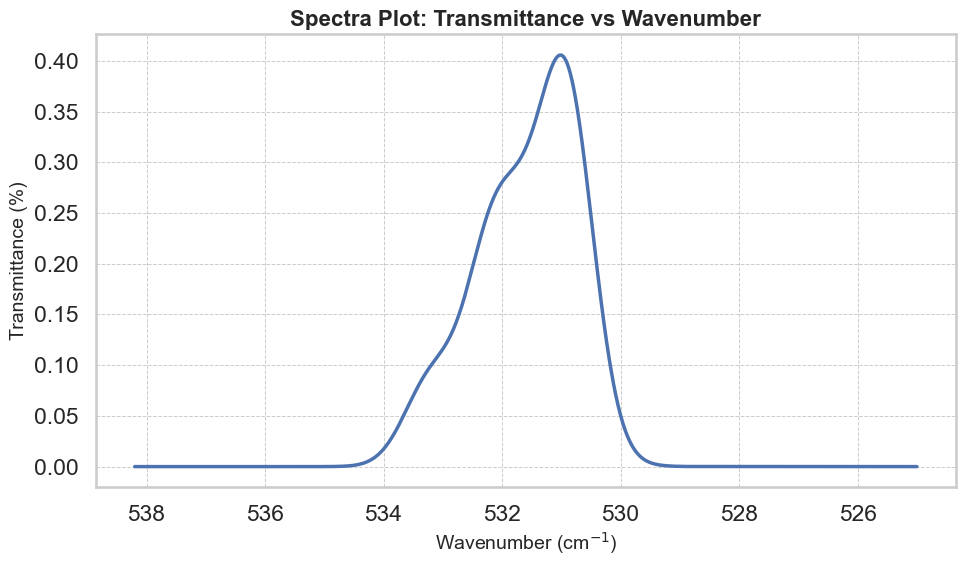

In [13]:
plot_single_spectra(spectra_data)

In [14]:
xps.df['simulated']

,envelope,H2O,H2O_{hb}_combined,OH_combined,O_combined,multiH2O
eV,,,,,,
525.000,3.614191e-30,6.232936e-57,3.079404e-48,1.961486e-38,3.614191e-30,8.948060e-74
525.001,3.704361e-30,6.458094e-57,3.181222e-48,2.019361e-38,3.704361e-30,9.317110e-74
525.002,3.796762e-30,6.691352e-57,3.286390e-48,2.078934e-38,3.796762e-30,9.701333e-74
525.003,3.891449e-30,6.933001e-57,3.395018e-48,2.140253e-38,3.891449e-30,1.010135e-73
525.004,3.988477e-30,7.183341e-57,3.507219e-48,2.203371e-38,3.988477e-30,1.051781e-73
...,...,...,...,...,...,...
538.196,1.604045e-28,6.310455e-40,3.507219e-48,3.761817e-58,2.615266e-75,1.604045e-28
538.197,1.565023e-28,6.126667e-40,3.395018e-48,3.628928e-58,2.511713e-75,1.565023e-28
538.198,1.526943e-28,5.948201e-40,3.286390e-48,3.500717e-58,2.412248e-75,1.526943e-28


In [15]:
import numpy as np

In [16]:
X = [4000, 3500, 3000, 2500, 2000, 1500, 1000]
Y = (1/100) * np.asarray([95, 90, 85, 80, 75, 70, 65])

In [17]:
def needleplot(X, Y):
    plt.figure(figsize=(8, 6))
    plt.stem(X, Y, basefmt=" ", linefmt='blue', markerfmt='bo')
    plt.xticks(X)
    plt.title('Needle Plot using Stem', size=20)
    plt.xlabel('Categories')
    plt.ylabel('Values')
    plt.ylim(0, max(Y) + 1)
    plt.show()

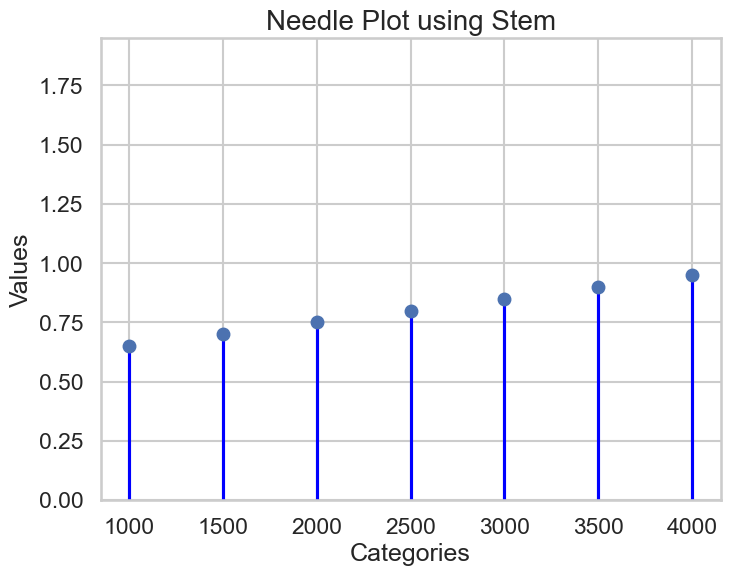

In [18]:
needleplot(X, Y)

In [19]:
X = [4000, 3500, 3000, 2500, 2000, 1500, 1000]
Y = (1/100) * np.asarray([95, 90, 85, 80, 75, 70, 65])
Y = Y.tolist()

spectra_test = {'location':X, 'intensity':Y}

In [20]:
[type(t) for t in Y]

[float, float, float, float, float, float, float]

In [21]:
from ir import IRSpecies, IRSignature

In [22]:
IRSpecies('sample', IRSignature('signature', peaks=spectra_test))

IRSpecies(species_list=[IRSignature(name='signature', peaks={'location': [4000, 3500, 3000, 2500, 2000, 1500, 1000], 'intensity': [0.9500000000000001, 0.9, 0.85, 0.8, 0.75, 0.7000000000000001, 0.65]})])

In [24]:
sample_species = IRSpecies('sample', IRSignature('signature', peaks=spectra_test))

In [25]:
sm = XPSSpeciesManager()
h2o_g = sm.make_species('H2O_g', sample_species , color='gray', latex='H_2O_g')

TypeError: Either orbitals or structure required.